All Rights Reserved @cimple-chandu

In [2]:

import numpy as np
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow .keras.models import load_model

# Define image parameters
IMG_SIZE = (224, 224)  # Modify based on your model's input size
BATCH_SIZE = 32

In [ ]:
model1=load_model(r'G:\My Drive\final_models\densenet169_97.h5')
model2=load_model(r'G:\My Drive\final_models\inceptionv3_97.h5')
# model3=load_model(r'G:\My Drive\final_models\Mobilenetv2_95.h5')
# model4=load_model(r'G:\My Drive\final_models\resnet152v2_94.h5')

In [ ]:
dataset_path =  r"G:\My Drive\Rice_Leaf_AUG" 
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical", subset="training", shuffle=False
)
val_generator = datagen.flow_from_directory(
    dataset_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical", subset="validation", shuffle=False
)

# Extract true labels
y_train = train_generator.classes
y_val = val_generator.classes


Found 11076 images belonging to 10 classes.
Found 2764 images belonging to 10 classes.


In [20]:
# Define Neural Network as Meta-Learner
meta_model = Sequential([
    Dense(128, activation='relu', input_shape=(20,)),  # Updated input shape
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for multi-class classification
])


meta_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
meta_model.summary()

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,594 (45.29 KB)

 Trainable params: 11,594 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
models=[model1,model2]
# Load image dataset

# Generate predictions from base models
train_meta_features = np.hstack([model.predict(train_generator) for model in models])
val_meta_features = np.hstack([model.predict(val_generator) for model in models])

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


347/347 ━━━━━━━━━━━━━━━━━━━━ 339s 973ms/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 178s 512ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 68s 784ms/step


In [21]:

meta_model.fit(train_meta_features, y_train, epochs=20, batch_size=16, validation_data=(val_meta_features, y_val))


Epoch 1/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8853 - loss: 0.6644 - val_accuracy: 0.9928 - val_loss: 0.0341
Epoch 2/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9960 - loss: 0.0216 - val_accuracy: 0.9935 - val_loss: 0.0405
Epoch 3/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9968 - loss: 0.0152 - val_accuracy: 0.9935 - val_loss: 0.0387
Epoch 4/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9928 - val_loss: 0.0386
Epoch 5/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9969 - loss: 0.0159 - val_accuracy: 0.9938 - val_loss: 0.0353
Epoch 6/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9970 - loss: 0.0112 - val_accuracy: 0.9938 - val_loss: 0.0318
Epoch 7/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9978 - loss: 0.0115 - val_accuracy: 0.9942 - val_loss: 0.0358
Epoch 8/20
693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9982 - loss: 0.0080 - 

In [22]:
meta_model.save(r'G:\My Drive\meta_model_2.h5')

In [23]:
# Evaluate the Stacked Model
y_pred = np.argmax(meta_model.predict(val_meta_features), axis=1)
accuracy = accuracy_score(y_val, y_pred)

print(f'Improved Stacked Model Accuracy: {accuracy:.4f}')

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
Improved Stacked Model Accuracy: 0.9935


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.models import load_model

In [ ]:
model1 = load_model(r'G:\My Drive\final_models\densenet169_97.h5')
model2 = load_model(r'G:\My Drive\final_models\inceptionv3_97.h5')

meta_model = load_model(r'G:\My Drive\meta_model_2.h5')

In [ ]:

# Preprocessing function for all models
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to extract features from all models
def extract_features(img_path):
    img_array = preprocess_image(img_path)
    
    # Model 1: DenseNet169
    img_array_densenet = preprocess_densenet(img_array)
    features_densenet = model1.predict(img_array_densenet)
    
    # Model 2: InceptionV3
    img_array_inception = preprocess_inception(img_array)
    features_inception = model2.predict(img_array_inception)
    
    # Combine features from all models (e.g., concatenate them into a single feature vector)
    combined_features = np.concatenate([features_densenet, features_inception], axis=1)
    
    return combined_features

# Function to make a prediction with the meta-learner model
def predict_with_meta_learner(img_path):
    # Extract features from all models
    features = extract_features(img_path)
    
    # Use the meta-learner to make a prediction based on the combined features
    prediction = meta_model.predict(features)
    
    # Get the predicted class (index of the highest probability)
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class

In [49]:
# Test with an example image
image_path = r"G:\My Drive\test\Narrow Brown Leaf Spot\IMG_20231014_172120.jpg"
predicted_class = predict_with_meta_learner(image_path)

# Assuming you have the class labels, let's print the predicted class
class_labels = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'Tungro']
print(f"The image belongs to: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
The image belongs to: Narrow Brown Leaf Spot


In [58]:
image_path = r"G:\My Drive\test\Tungro\tungro1652.jpg"
predicted_class = predict_with_meta_learner(image_path)

# Assuming you have the class labels, let's print the predicted class
class_labels = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'Tungro']
print(f"The image belongs to: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The image belongs to: Tungro


In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib .pyplot as plt
import seaborn as sns

Accuracy: 0.9935
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       239
           1       1.00      0.99      0.99       309
           2       1.00      1.00      1.00       217
           3       0.99      0.99      0.99       349
           4       0.99      0.99      0.99       266
           5       0.97      0.98      0.97       190
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       259
           8       1.00      0.99      1.00       325
           9       1.00      1.00      1.00       410

    accuracy                           0.99      2764
   macro avg       0.99      0.99      0.99      2764
weighted avg       0.99      0.99      0.99      2764



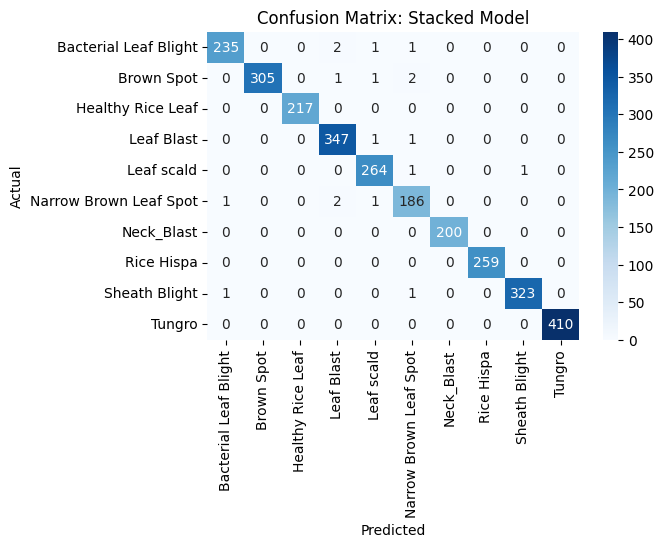

In [67]:
# Calculate and print the metrics
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(class_labels), yticklabels=np.unique(class_labels))
plt.title(f'Confusion Matrix: Stacked Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()